# Bài tập 5


Triệu Nhật Minh - 21127112

---

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Linear Regression Error

## 1.

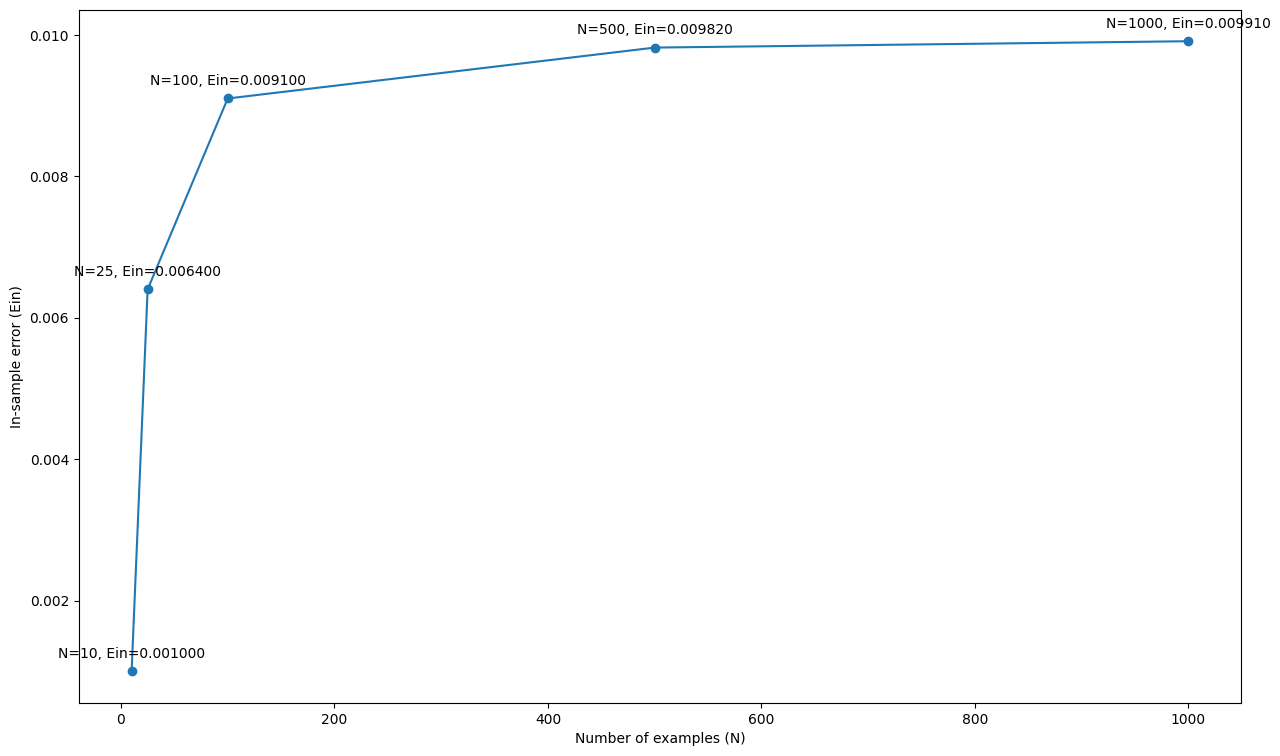

In [2]:
def calculate_error_LR(sigma, d, N):
    return sigma**2 * (1 - (d + 1) / N)

def calculate_smallest_N(sigma, d, expected_Ein, options):
    # Convert options to numpy array for vectorized operations
    options = np.array(options)
    # Calculate Ein for all options at once
    errors = calculate_error_LR(sigma, d, options)
    # Find the smallest N that results in Ein > expected_Ein
    potential_Ein = np.where(errors > expected_Ein)[0]
    smallest_N = options[potential_Ein[0]] if potential_Ein.size > 0 else None
    return smallest_N, errors

# Given values
sigma = 0.1
d = 8
expected_Ein = 0.008

# Options for N
options = [10, 25, 100, 500, 1000]

# Call the function
result, errors = calculate_smallest_N(sigma, d, expected_Ein, options)

# Plot errors
plt.figure(figsize=(15, 9))
plt.plot(options, errors, 'o-')  # 'o-' makes it clear where the points are
plt.xlabel('Number of examples (N)')
plt.ylabel('In-sample error (Ein)')

# Annotate points with their N value
for i, N in enumerate(options):
    plt.annotate(f'N={N}, Ein={errors[i]:.6f}', (N, errors[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

[1] The correct answer is [c] 100.

# Nonlinear Transform

## 2.

$$
\Phi(1, x_1, x_2) = (1, x_1^2, x_2^2)
$$

From the figure we can acknowledge this is the binary classification problem.

$$
h(x) = \text{sign}(\tilde{w}_0 + \tilde{w}_1x_1^2 + \tilde{w}_2x_2^2)
$$

From the function we acknowledge that:
- $x_1^2$ is non-negative, so the sign of $\tilde{w}_1x_1^2$ depends on the sign of $\tilde{w}_1$.
- $x_2^2$ is non-negative, so the sign of $\tilde{w}_2x_2^2$ depends on the sign of $\tilde{w}_2$.

If one of the feature $x_1^2$ or $x_2^2$ reaches $\infty$, $h(x)$ will depend on the sign of the corresponding weight $\tilde{w}_1$ or $\tilde{w}_2$.

So, the sign of $h(x)$ depends on the sign of $\tilde{w}_1$ and $\tilde{w}_2$ (assuming that $\tilde{w}_0$ is positive).

![](imgs/2_1.png)

From the figure we can see that:
- If $x_1^2$ reaches $\infty$ ($x_1 \to -\infty$ or $x_1 \to +\infty$), $h(x)$ will be negative. Hence $\tilde{w}_1$ must be negative (or $\tilde{w}_1 < 0$).
- If $x_2^2$ reaches $\infty$ ($x_2 \to -\infty$ or $x_2 \to +\infty$), $h(x)$ will be positive. Hence $\tilde{w}_2$ must be positive (or $\tilde{w}_2 > 0$).

[2] The correct answer is [d] $\tilde{w}_1 < 0$ and $\tilde{w}_2 > 0$.

## 3.

From the slide 3 of lecture 9, we have the price to pay when using nonlinear transform:
$$
d_{VC} \leq \tilde{d} + 1
$$

where $\tilde{d}$ is the number of parameters in the nonlinear transform, not including the constant term $w_0$.

So in this problem, we have the 4th order polynomial transform from the input space $\mathbb{R}^2$ which has $\tilde{d} = 14$ parameters. So the VC dimension is $d_{VC} \leq 15$.

[3] Hence the smallest value that is not less than $d_{VC}$ is [c] 15.

# Gradient Descent

## 4.

$$
E(u,v) = (ue^v - 2ve^{-u})^2
$$

$
\begin{align}
\frac{\partial E}{\partial u} &= 2(ue^v - 2ve^{-u})(e^v + 2ve^{-u}) \\
\frac{\partial E}{\partial u} &= 2(e^v + 2ve^{-u})(ue^v - 2ve^{-u})
\end{align}
$


[4] The correct answer is [e] $2(e^v + 2ve^{-u})(ue^v - 2ve^{-u})$

## 5.

In [3]:
def calculate_error_LR(u, v):
    return (u*np.exp(v) - 2*v*np.exp(-u))**2

def dE_du(u, v):
    return 2 * (np.exp(v) + 2*v*np.exp(-u)) * (u*np.exp(v) - 2*v*np.exp(-u))

def dE_dv(u, v):
    return 2 * (u*np.exp(v) - 2*np.exp(-u)) * (u*np.exp(v) - 2*v*np.exp(-u))

u, v = 1.000, 1.000
learning_rate = 0.1 

iteration = 0
while calculate_error_LR(u, v) >= 1e-14:
    # print(calculate_error_LR(u, v))
    du = dE_du(u, v)
    dv = dE_dv(u, v)
    u -= learning_rate * du
    v -= learning_rate * dv
    print(u, v)
    iteration += 1

print(iteration)
print(u, v)

-0.3695429931968397 0.21392055362457985
0.03052069035126309 -0.5079340454438057
0.10752311419899835 -0.12221025557350329
0.06564482581488218 -0.015166559876933133
0.047841170621718825 0.0184898992267451
0.044999463099433715 0.023499251696793233
0.04475601902934548 0.023924296470397774
0.04473774604067707 0.023956174796613786
0.044736390817507084 0.023958538922248602
0.04473629039778207 0.023958714099141746
10
0.04473629039778207 0.023958714099141746


[5] The correct answer is [d] 10

## 6.

In [4]:
final_u, final_v = u, v  # replace with your actual values

options = np.array([
    [1.000, 1.000],
    [0.713, 0.045],
    [0.016, 0.112],
    [-0.083, 0.029],
    [0.045, 0.024]
])

distances = np.sqrt(np.sum((options - np.array([final_u, final_v]))**2, axis=1))
closest_choice = options[np.argmin(distances)]

print(closest_choice)

[0.045 0.024]


[6] The correct answer is [e] (0.045, 0.024)

## 7.

In [5]:
# Assuming E(u, v), dE_du(u, v), and dE_dv(u, v) are defined as before
learning_rate = 0.1
u, v = 1, 1  # initialize u and v
iterations = 15

for _ in range(iterations):
    # Step 1: move only along the u coordinate
    du = dE_du(u, v)
    u -= learning_rate * du

    # Step 2: move only along the v coordinate
    dv = dE_dv(u, v)
    v -= learning_rate * dv

# Calculate the error after 15 iterations
error = calculate_error_LR(u, v)
print(error)

0.13981379199615315


[7] The correct answer is [a] 0.1

# Logistic Regression

### Generate target w and data set

In [6]:
def generate_target_w():
    """
    Generates target_w from two random, uniformly distributed points in [-1, 1] x [-1, 1].
    
    Returns
    -------
    target_w : numpy array, shape (3, 1) 
        The vector of parameters of f.
    """
    # Generate two points from a uniform distribution over [-1, 1]x[-1, 1]
    x1 = np.random.uniform(-1, 1, 2)
    x2 = np.random.uniform(-1, 1, 2)
    # Compute the target W from these two points
    target_w = np.array([x1[1] * x2[0] - x1[0] * x2[1], x2[1] - x1[1], x1[0] - x2[0]]).reshape((-1, 1))
    
    return target_w

In [7]:
def generate_data(N, target_w):
    """
    Generates a data set by generating random inputs and then using target_w to generate the 
    corresponding outputs.
    
    Parameters
    ----------
    N : int
        The number of examples.
    target_w : numpy array, shape (, 1) 
        The vector of parameters of f.
    
    Returns
    -------
    X : numpy array, shape (N, 3)
        The matrix of input vectors (each row corresponds to an input vector); the first column of 
        this matrix is all ones.
    Y : numpy array, shape (N, 1)
        The vector of outputs.        
    """
    while True:
        X = np.random.uniform(-1, 1, (N, 2))
        X = np.hstack((np.ones((N, 1)), X)) # Add 'ones' column
        Y = np.sign(np.dot(X, target_w))

        if np.all(Y != 0):  # If all points are classified as either +1 or -1
            break
        
    return X, Y

### Perform logistic regression using SGD

In [8]:
# This function performs logistic regression using stochastic gradient descent.
def logistic_regression(num_samples, X, Y, learning_rate, epsilon):
    # Initialize the weight vector to all zeros.
    w = np.zeros((X.shape[1], 1))
    
    # Initialize the number of epochs to 0.
    num_epochs = 0
    
    # Continue the loop until the norm of the difference between the new and old weights is less than epsilon.
    while True:
        # Increment the number of epochs.
        num_epochs += 1
        
        # Make a copy of the current weights.
        w_temp = np.copy(w)
        
        # For each sample in a random permutation of the samples...
        for i in np.random.permutation(num_samples):
            # Compute the gradient of the cross-entropy loss with respect to the weights.
            grad = -np.divide(Y[i] * X[i], 1 + np.exp(Y[i] * np.dot(X[i], w)))
            
            # Update the weights by taking a step in the direction of the negative gradient.
            w_temp -= learning_rate * grad.reshape(-1, 1)
        
        # If the norm of the difference between the new and old weights is less than epsilon, break the loop.
        if np.linalg.norm(w - w_temp) < epsilon:
            break
        
        # Update the current weights.
        w = w_temp
    
    # Return the number of epochs and the final weights.
    return num_epochs, w

### Calculate E_out for each run

In [9]:
def calculate_E_out(Nt, Xt, Yt, w_nt):
    # The cross-entropy error for a sample is ln(1 + exp(-y_n * w_n^T * x_n)).
    E_out_n = sum(np.log(1 + np.exp(-Yt[i]*np.dot(Xt[i], w_nt.flatten()))) for i in range(Nt))
    
    # Return the average cross-entropy error.
    return E_out_n / Nt

### Execute

In [10]:
# Inputs
N = 100 # number of examples
Nt = 1000 # number of test examples
learning_rate = 0.01
epsilon = 0.01 # stoping criteria
N_trials = 100 # no of times to run the experiment

epochs = []
Eout = []
for n in range(N_trials):
    # target line label
    l = generate_target_w()
    # Get train and test data
    X, Y = generate_data(N, l)
    Xt, Yt = generate_data(Nt, l)
    
    # Run logistic regression
    num_epochs, w = logistic_regression(N, X, Y, learning_rate, epsilon)
    epochs.append(num_epochs)
    
    # Compute cross entropy error
    Eout.append(calculate_E_out(Nt, Xt, Yt, w))

print('Average cross entropy error: ', np.mean(Eout))
print('Average number of epochs: ', np.mean(epochs))

Average cross entropy error:  0.10514378747987647
Average number of epochs:  339.56


## 8.

[8] The correct answer is [d] 0.100

## 9.

[9] The correct answer is [a] 350

# PLA vs SGD

## 10.

The error function $e(\mathbf{w}) = -y \mathbf{w}^T \mathbf{x}$ is selected for Stochastic Gradient Descent (SGD) in linear classification because it quantifies the error for an individual data point.

- The term $\mathbf{w}^T \mathbf{x}$ is a weighted sum of the features $\mathbf{x}$, with the weights being $\mathbf{w}$. This represents the predicted output from the linear classifier.

- $y$ denotes the actual output for the given data point.

- The expression $-y \mathbf{w}^T \mathbf{x}$ will yield a negative value if the predicted and actual outputs share the same sign (indicating a correct prediction), and a positive value if they have different signs (indicating an incorrect prediction).

Let's choose $e(\mathbf{w}) = -y \mathbf{w}^T \mathbf{x}$ as the error function for Stochastic Gradient Descent (SGD) in linear classification.

The gradient of $e(\mathbf{w})$ is:
$$
\nabla e(\mathbf{w}) = -y \mathbf{x}
$$

Following the logistic regression algorithm and stochastic gradient descent, we update $\mathbf{w}$ as follows:
$$
\begin{align}
\mathbf{w} \leftarrow \mathbf{w} - \eta \nabla e(\mathbf{w}) \\
\mathbf{w} \leftarrow \mathbf{w} + \eta y \mathbf{x} \\
\mathbf{w} \leftarrow \mathbf{w} + y \mathbf{x} &\ (\eta = 1)
\end{align}
$$

In the context of binary classification, we only have two cases:
- The predicted output and actual output share the same sign: $y \mathbf{w}^T \mathbf{x} > 0$
- The predicted output and actual output have different signs: $y \mathbf{w}^T \mathbf{x} < 0$

Hence, to keep the generality, we have the error function
$$
e(\mathbf{w}) = -\text{min}(0, y_n \mathbf{w}^T \mathbf{x}_n)
$$

If the prediction is correct, the $y_n \mathbf{w}^T \mathbf{x}_n$ will be positive, and the error will be 0. Otherwise, the error will be $-y_n \mathbf{w}^T \mathbf{x}_n$.

[10] The correct answer is [e] $e(\mathbf{w}) = -\text{min}(0, y_n \mathbf{w}^T \mathbf{x}_n)$

# References

[1] [Exercise 2 - bason1999qn, GitHub](https://github.com/bason1999qn/Learning_from_data/blob/master/HW5-Submission.ipynb)

[2] [Exercise 5, 8, 9 - itacdonev, GitHub](https://github.com/itacdonev/Learning_From_Data_Caltech/blob/master/HW5/HW5.ipynb)

[3] [Exercise 10 - homefish, GitHub](https://github.com/homefish/edX_Learning_From_Data_2017/blob/master/homework_5/hw5_p10_PLA_as_SGD.ipynb)